In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
diabetes_clean = "Resources/diabetes_clean.csv"
diabetes_clean = pd.read_csv(diabetes_clean, encoding="utf-8")
diabetes_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


In [6]:
X = diabetes_clean.loc[:, diabetes_clean.columns != 'Outcome']
y = diabetes_clean['Outcome']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=diabetes_clean['Outcome'], random_state=42)

In [14]:
X_scaler = StandardScaler().fit(X_train.reshape(-1,1))

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [6]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
#K Nearest Neighbors
train_scores = []
test_scores = []

for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.663
k: 3, Train/Test Score: 0.867/0.714
k: 5, Train/Test Score: 0.850/0.755
k: 7, Train/Test Score: 0.816/0.755
k: 9, Train/Test Score: 0.823/0.745
k: 11, Train/Test Score: 0.820/0.765
k: 13, Train/Test Score: 0.813/0.765
k: 15, Train/Test Score: 0.789/0.776
k: 17, Train/Test Score: 0.782/0.765
k: 19, Train/Test Score: 0.786/0.796


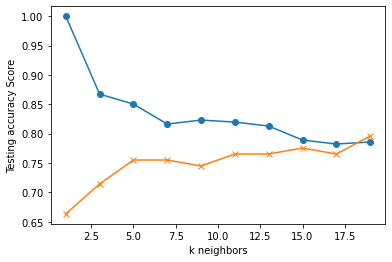

In [8]:
plt.plot(range (1, 20, 2), train_scores, marker='o')
plt.plot(range (1, 20, 2), test_scores, marker='x')
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
#Using k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.755


In [10]:
new_diabetes_data = [0,100,80,23,94,25.5,0.500,22]
predicted_outcome = knn.predict(new_diabetes_data)
print(predicted_outcome)

ValueError: Expected 2D array, got 1D array instead:
array=[  0.  100.   80.   23.   94.   25.5   0.5  22. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# jupyter nbconvert --to=python model.ipynb